# BLG454E Learning From Data Homework 1

Before starting, read the README.txt file. If you have any questions, send an e-mail at kamard@itu.edu.tr.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the found line with the data.
    
Given learning rate and number of iterations as default values in the code should work, but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [ ]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    beta0 = np.random.randn()
    beta1 = np.random.randn()
    
    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        grad0 = -2 * np.sum((y - (beta0 + beta1 * x))) / x.shape[0]
        grad1 = -2 * np.sum(x * (y - (beta0 + beta1 * x))) / x.shape[0]
        
        # TO DO: take gradient descent step
        beta0 = beta0 - learning_rate * grad0
        beta1 = beta1 - learning_rate * grad1   
        
        # TO DO: calculate and print the loss value
        loss = np.sum((y - (beta0 + beta1 * x)) ** 2) / x.shape[0]
        print(loss)

    return beta0, beta1

In [ ]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)

# TO DO: Plot the data AND the line!
plt.plot(x, y, '.')
plt.plot(x, beta0 + beta1 * x)

# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, we are giving you only the load_data function, so you are flying solo for Multi Linear Regression! It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
def load_data():
    data= fetch_california_housing()
    #print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    #print("Shape of the X: ", data.data.shape)
    #print("Shape of the Y: ", data.target.shape)
    return data.data, data.target



def multiple_gradient_descent_KFold(x, y, learning_rate = 0.1, max_its = 1000):
    x, y = load_data()
    kfold = KFold(5)
    arr = np.array([])
    
    #this for loop splits x and assign one different fold for testing in every loop 
    for train, test in kfold.split(x):
        
        #normalize x, it gives significantly better result
        x = (x - np.mean(x, axis = 0) ) / np.std(x, axis = 0, ddof = 1) 
        
        #assign weights randomly
        weights = np.random.rand(9,1)
        
        #assign folds to their names
        x_test = x[test]
        x_train = x[train]
        y_test = y[test]
        y_train = y[train]
        
        for k in range(0,max_its):
            #calculate predicted for training data 
            predicted = weights[0] + np.dot(weights[1:].T, x_train.T)
            
            #calculate gradients
            dw = -2 * np.dot(x_train.T, (y_train - predicted).T) / x_train.shape[0]
            db = -2 * (np.sum(y_train - predicted)) / x_train.shape[0]
            
            #gradient descent
            weights[1:] = weights[1:] - learning_rate * dw
            weights[0] = weights[0] - learning_rate * db
            
            #calculate predicted after gradient descent and print loss
            if(k % 100 == 0):
                predicted = weights[0] + np.dot(weights[1:].T, x_train.T)
                loss = np.sum((y_train - predicted) ** 2) / x_train.shape[0]
                print('training loss  = ', loss)
            if(k == max_its - 1): 
                print('-------------')
        
        #calculate predicted using final weights for this fold and test values and assign losses to array
        predicted = weights[0] + np.dot(weights[1:].T, x_test.T)
        loss = np.sum((y_test - predicted) ** 2) / x_test.shape[0]
        arr = np.append(arr, loss)
    
    print('average MSE test loss = ', np.sum(arr) / arr.size)
    print('variance of testing MSE losses = ', np.var(arr))
    

In [ ]:
x, y = load_data()
multiple_gradient_descent_KFold(x, y)

# Part 3: Probability Questions (20 Points)

In this part, you are given 2 probability questions that you will solve by hand ( You do not code anything ). You can either share your answer via Markdown Cells, or you can insert an image of your hand-written solution on a paper. To insert an image, after changing the cell type to Markdown, click Edit -> Insert Image. This way, you do not have to keep the image in local, it will be directly embedded in the notebook file. Try to keep your answers as illustrative as possible.

### Question 1

Istanbul is a busy city, and unfortunately busy cities tend to have busy traffics. In Istanbul, one in every two days, there is a traffic jam on the main roads, if the weather is sunny. However if it rains, it gets worse! Three in every four rainy days, main roads are jammed with traffic! 

Our beloved lecturer, Assoc. Prof. Yusuf Yaslan is a very responsible lecturer, however sometimes life happens, and he might arrive late to the class. If the weather is rainy and there is a traffic jam, the probability of him being late is 20%. Otherwise, he is late to only 5% of the classes. You can assume rainy and sunny weather each have 1/2 probability of happening.

Given a randomly selected day:

- What is the probability that the weather is rainy, there is no traffic jam and Prof. Yaslan is NOT late to the class?


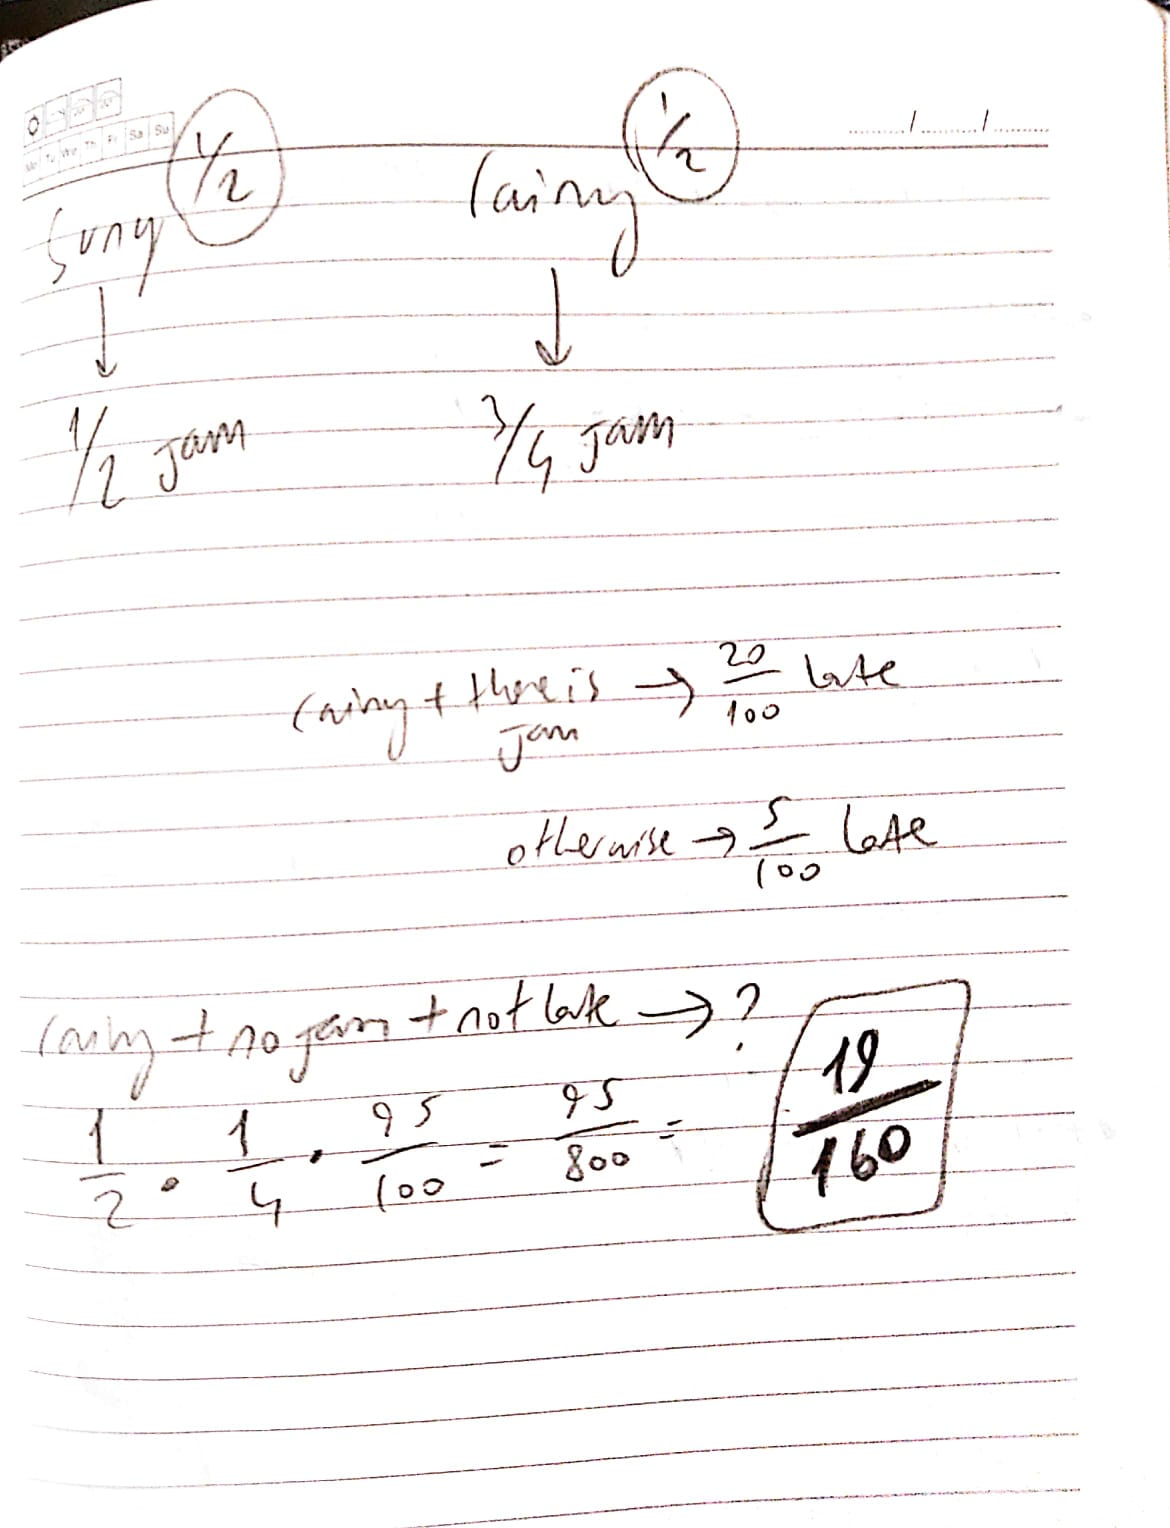

### Question 2

I am a magician, and as every magician, I have a tricky coin that results in heads 75% of the times when tossed instead of the usual 50%. However, one day, I put this tricky coin next to a regular coin and left it there, and now I can't remember which one is which! Nevertheless, I took one of the coins, not knowing if I took tricky coin or the regular coin. You can assume that the regular coin has a 50% chance of landing on heads. Now I toss the coin I took 10 times and record the results.

- What is the probability of getting exactly 4 heads?
- What is the probability of getting at least 9 heads?


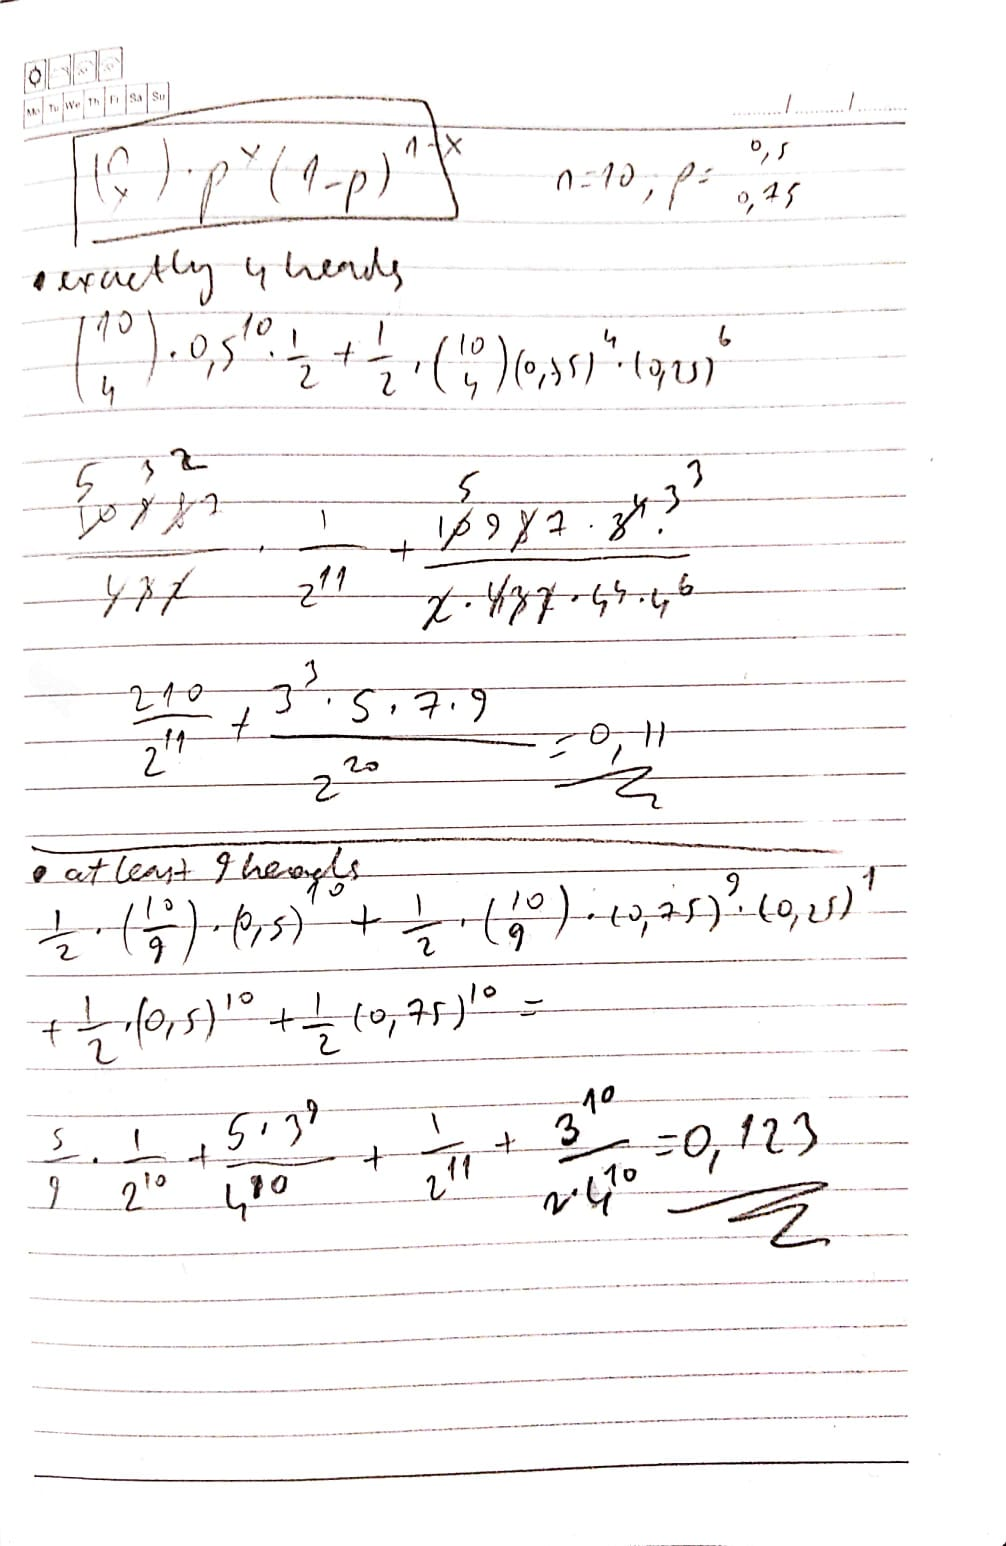
